In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
marvel_characters= ['https://en.wikipedia.org/wiki/Iron_Man',
'https://en.wikipedia.org/wiki/Spider-Man',
'https://en.wikipedia.org/wiki/Hulk',
'https://en.wikipedia.org/wiki/Captain_America',
'https://en.wikipedia.org/wiki/Thor_(Marvel_Comics)',
'https://en.wikipedia.org/wiki/Bucky_Barnes']

In [3]:
marvel_characters

['https://en.wikipedia.org/wiki/Iron_Man',
 'https://en.wikipedia.org/wiki/Spider-Man',
 'https://en.wikipedia.org/wiki/Hulk',
 'https://en.wikipedia.org/wiki/Captain_America',
 'https://en.wikipedia.org/wiki/Thor_(Marvel_Comics)',
 'https://en.wikipedia.org/wiki/Bucky_Barnes']

In [4]:
for i in marvel_characters:
    url = i
    response=requests.get(url)
    html=response.content
    soup=bs(html,"lxml")
    all_h1=soup.find_all("h1")
    for all_h1 in all_h1:
        print(all_h1.text)

Iron Man
Spider-Man
Hulk
Captain America
Thor (Marvel Comics)
Bucky Barnes


In [5]:
for i in marvel_characters:
    url = i
    response=requests.get(url)
    html=response.content
    soup=bs(html,"lxml")
    full_content_length=0
    all_p= soup.find_all("p")
    for all_p in all_p:
        # get the text, strip whitespace, and split into words
        paragraph_text = all_p.get_text(strip=True).split()
        # calculate the length of the list of words
        paragraph_length = len(paragraph_text)
        full_content_length= full_content_length + paragraph_length
    print(full_content_length,url)

6516 https://en.wikipedia.org/wiki/Iron_Man
7281 https://en.wikipedia.org/wiki/Spider-Man
9929 https://en.wikipedia.org/wiki/Hulk
5992 https://en.wikipedia.org/wiki/Captain_America
3479 https://en.wikipedia.org/wiki/Thor_(Marvel_Comics)
5987 https://en.wikipedia.org/wiki/Bucky_Barnes


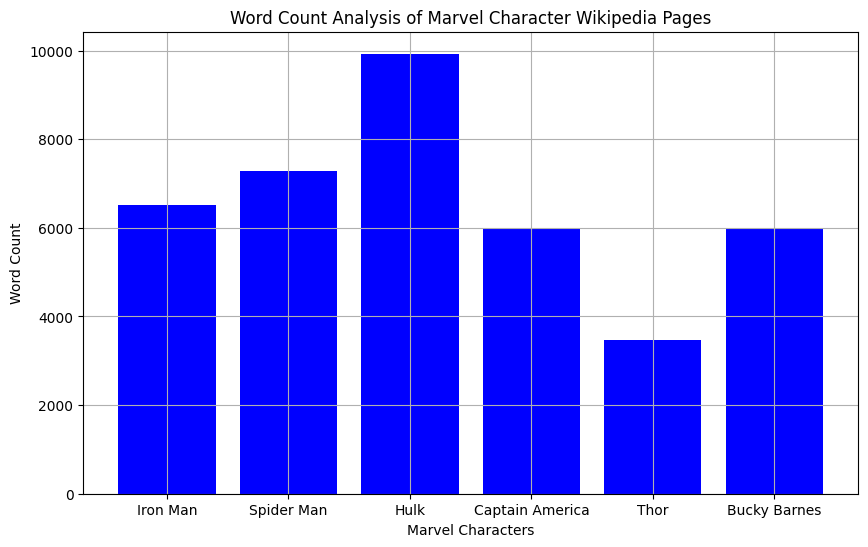

In [6]:
import matplotlib.pyplot as plt

# Sample data
character_names = ['Iron Man', 'Spider Man', 'Hulk', 'Captain America', 'Thor', 'Bucky Barnes']
word_counts = [6516, 7278, 9929, 5992, 3479, 5985]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(character_names, word_counts, color='blue')
plt.xlabel("Marvel Characters")
plt.ylabel("Word Count")
plt.title("Word Count Analysis of Marvel Character Wikipedia Pages")
plt.grid(True)
plt.show()

In [7]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

# List of Marvel character Wikipedia URLs
marvel_characters = [

    'https://en.wikipedia.org/wiki/Iron_Man',
    'https://en.wikipedia.org/wiki/Spider-Man',
    'https://en.wikipedia.org/wiki/Hulk',
    'https://en.wikipedia.org/wiki/Captain_America',
    'https://en.wikipedia.org/wiki/Thor_(Marvel_Comics)',
    'https://en.wikipedia.org/wiki/Bucky_Barnes'
]

# Initialize data storage
data = []

# Function to extract page metrics
def extract_wiki_metrics(url):
    response = requests.get(url)
    soup = bs(response.content, "lxml")

    # Basic metrics
    title = soup.find("h1", id="firstHeading").text.strip()

    # Word count
    paragraphs = soup.find_all("p")
    word_count = sum(len(p.get_text(strip=True).split()) for p in paragraphs)

    # Text size (bytes) - a good indicator of content volume
    text_size = len(soup.get_text())

    # Heading count and structure depth
    headings = soup.find_all(["h1", "h2", "h3", "h4", "h5", "h6"])
    heading_count = len(headings)

    # Section depth (max heading level) - more depth means more detailed content
    section_depth = 0
    for heading in headings:
        level = int(heading.name[1])
        section_depth = max(section_depth, level)

    # Internal connections to other topics
    internal_links = soup.find_all("a", href=True)
    wiki_links = [a for a in internal_links if a['href'].startswith('/wiki/') and ':' not in a['href']]
    internal_link_count = len(wiki_links)

    # Images - more images mean more visual coverage
    images = soup.find_all("img")
    image_count = len(images)

    # Tables - structured data indicates importance
    tables = soup.find_all("table")
    table_count = len(tables)

    # Infobox presence and size
    infobox = soup.find("table", class_=lambda c: c and 'infobox' in c)
    infobox_size = len(infobox.get_text()) if infobox else 0

    # Categories - more categories mean broader relevance
    categories = soup.find_all("div", {"id": "mw-normal-catlinks"})
    category_count = len(categories[0].find_all("a")) - 1 if categories else 0  # -1 to exclude "Categories" link

    # Try to get page edits history
    try:
        history_url = url.replace('/wiki/', '/w/index.php?title=') + '&action=history'
        history_response = requests.get(history_url)
        history_soup = bs(history_response.content, "lxml")
        edit_entries = history_soup.find_all("li", class_="mw-contribution-revision")
        recent_edits = len(edit_entries)
    except:
        recent_edits = 0

    # Return all metrics
    return {
        "Character": title,
        "Word Count": word_count,
        "Text Size (bytes)": text_size,
        "Headings": heading_count,
        "Section Depth": section_depth,
        "Wiki Links": internal_link_count,
        "Image Count": image_count,
        "Table Count": table_count,
        "Infobox Size": infobox_size,
        "Category Count": category_count,

    }

# Process each character
print("Gathering data for Marvel characters...")
for url in marvel_characters:
    metrics = extract_wiki_metrics(url)
    data.append(metrics)
    print(f"Processed: {metrics['Character']}")

# Create DataFrame
df = pd.DataFrame(data)

# Display raw metrics
print("\nRaw metrics collected:")
print(df)

Gathering data for Marvel characters...
Processed: Iron Man
Processed: Spider-Man
Processed: Hulk
Processed: Captain America
Processed: Thor (Marvel Comics)
Processed: Bucky Barnes

Raw metrics collected:
              Character  Word Count  Text Size (bytes)  Headings  \
0              Iron Man        6516             110343        26   
1            Spider-Man        7281             160814        28   
2                  Hulk        9929             147350        60   
3       Captain America        5992             115458        26   
4  Thor (Marvel Comics)        3479              80770        21   
5          Bucky Barnes        5987              88963        32   

   Section Depth  Wiki Links  Image Count  Table Count  Infobox Size  \
0              3        3454           29           55           679   
1              3        4190           43           76          1032   
2              5        3750           31           51          1020   
3              3        3873  

In [8]:
# Calculate composite popularity score using weighted metrics
weights = {
    "Word Count": 0.15,           # Content volume
    "Text Size (bytes)": 0.05,    # Total text volume
    "Headings": 0.05,             # Content structure
    "Section Depth": 0.05,        # Content detail
    "Wiki Links": 0.15,           # Interconnectedness
    "Image Count": 0.05,          # Visual representation
    "Table Count": 0.05,          # Structured information
    "Infobox Size": 0.05,         # Key facts availability
    "Category Count": 0.05,       # Taxonomic breadth
}

# Normalize data using Min-Max scaling
numerical_columns = [col for col in df.columns if col != "Character"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_scaled["Character"] = df["Character"]

# Calculate weighted popularity score
df_scaled["Popularity Score"] = 0
for column in weights:
    df_scaled["Popularity Score"] += df_scaled[column] * weights[column]

# Sort by popularity score
df_sorted = df_scaled.sort_values(by="Popularity Score", ascending=False)

# Show detailed results with normalized scores
result_columns = ["Character"] + list(weights.keys()) + ["Popularity Score"]
display_df = df_sorted[result_columns].round(3)

print("\nPopularity Analysis Results (Normalized and Weighted):")
print(display_df[["Character", "Popularity Score"]].to_string(index=False))


Popularity Analysis Results (Normalized and Weighted):
           Character  Popularity Score
                Hulk             0.530
          Spider-Man             0.480
     Captain America             0.295
            Iron Man             0.269
        Bucky Barnes             0.150
Thor (Marvel Comics)             0.147


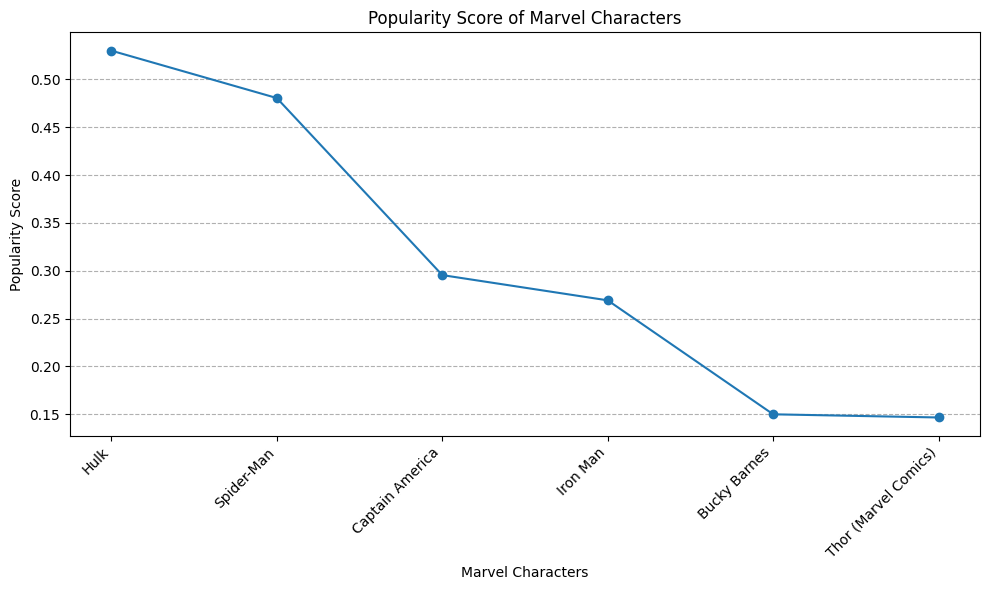

In [9]:
import matplotlib.pyplot as plt

# Extract character names and popularity scores
characters = df_sorted["Character"].tolist()
scores = df_sorted["Popularity Score"].tolist()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(characters, scores, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Marvel Characters")
plt.ylabel("Popularity Score")
plt.title("Popularity Score of Marvel Characters")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
!pip install nltk
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Marvel characters URLs
marvel_characters = [

    'https://en.wikipedia.org/wiki/Iron_Man',
    'https://en.wikipedia.org/wiki/Spider-Man',
    'https://en.wikipedia.org/wiki/Hulk',
    'https://en.wikipedia.org/wiki/Captain_America',
    'https://en.wikipedia.org/wiki/Thor_(Marvel_Comics)',
    'https://en.wikipedia.org/wiki/Bucky_Barnes'
]

character_names = ["Iron Man", "Spider-Man", "Hulk", "Captain America", "Thor", "Bucky Barnes"]

# Function to scrape Wikipedia text
def scrape_wiki(url):
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")

    # Get all paragraphs
    paragraphs = soup.find_all("p")
    text = ' '.join([p.get_text() for p in paragraphs])

    # Clean text by removing citations and special characters
    text = re.sub(r'\[\d+\]', '', text)  # Remove citations
    text = re.sub(r'\s+', ' ', text)     # Normalize whitespace

    return text

# Collect data for each character
character_data = []
for i, url in enumerate(marvel_characters):
    text = scrape_wiki(url)
    character_data.append({
        'name': character_names[i],
        'url': url,
        'text': text,
        'word_count': len(text.split())
    })

# Create a DataFrame
df = pd.DataFrame(character_data)
print("Character data collected:\n")
print(df[['name', 'word_count']])

# Extract personality traits and key attributes using NLP
def extract_traits(text, character_name):
    doc = nlp(text)

    # Look for adjectives near character mentions
    traits = []
    for sent in doc.sents:
        sent_text = sent.text.lower()
        if character_name.lower() in sent_text:
            for token in sent:
                # Get adjectives that might describe character traits
                if token.pos_ == "ADJ" and token.dep_ in ["amod", "acomp"]:
                    traits.append(token.text)

    # Count trait occurrences
    trait_counter = Counter(traits)
    return trait_counter

print("\n--- Character traits analysis---")
all_traits = {}
for char in character_data:
    traits = extract_traits(char['text'], char['name'])
    all_traits[char['name']] = traits
    print(f"\nTop traits for {char['name']}:")
    for trait, count in traits.most_common(10):
        print(f"  {trait}: {count}")


Character data collected:

              name  word_count
0         Iron Man        7252
1       Spider-Man        8136
2             Hulk       10712
3  Captain America        6695
4             Thor        3937
5     Bucky Barnes        6387

--- Character traits analysis---

Top traits for Iron Man:
  other: 14
  new: 13
  first: 10
  several: 8
  -: 8
  communist: 7
  American: 6
  comic: 6
  own: 6
  such: 6

Top traits for Spider-Man:
  comic: 18
  other: 11
  first: 10
  original: 9
  new: 8
  early: 6
  great: 6
  ongoing: 6
  many: 6
  secret: 5

Top traits for Hulk:
  new: 14
  other: 9
  comic: 8
  many: 7
  green: 6
  nuclear: 6
  original: 6
  separate: 6
  alternate: 6
  physical: 5

Top traits for Captain America:
  American: 15
  first: 15
  comic: 10
  popular: 7
  new: 7
  political: 6
  -: 5
  final: 5
  original: 5
  many: 5

Top traits for Thor:
  new: 9
  mythological: 7
  other: 7
  several: 6
  comic: 4
  Asgardian: 4
  own: 3
  many: 3
  human: 3
  such: 3

Top

In [12]:
# TF-IDF Analysis
from tabulate import tabulate
# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([char['text'] for char in character_data])

# Get top keywords for each character
def get_top_keywords(tfidf_matrix, feature_names, doc_index, top_n=10):
    tfidf_scores = tfidf_matrix[doc_index].toarray()[0]
    top_indices = tfidf_scores.argsort()[-top_n:][::-1]
    return [(feature_names[i], tfidf_scores[i]) for i in top_indices]

feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a keywords dictionary with character name as key
keywords_dict = {}
for i, char in enumerate(character_data):
    keywords_dict[char['name']] = get_top_keywords(tfidf_matrix, feature_names, i)

def create_detailed_keyword_table():
    # Find the maximum number of keywords across all characters
    max_keywords = max(len(kw) for kw in keywords_dict.values())

    # Create rows for the table
    rows = []
    for i in range(max_keywords):
        row = []
        for char_name in character_names:
            if i < len(keywords_dict[char_name]):
                keyword, score = keywords_dict[char_name][i]
                row.append(f"{keyword} ({score:.3f})")
            else:
                row.append("")
        rows.append(row)

    # Create DataFrame with character names as columns
    detailed_df = pd.DataFrame(rows, columns=character_names)
    return detailed_df

# Create the detailed table
detailed_table = create_detailed_keyword_table()
print("\n--- Detailed keyword table ---")
print(tabulate(detailed_table, headers='keys', tablefmt='grid'))


--- Detailed keyword table ---
+----+--------------------+-------------------+--------------------+-------------------+-------------------+-----------------+
|    | Iron Man           | Spider-Man        | Hulk               | Captain America   | Thor              | Bucky Barnes    |
+====+====================+===================+====================+===================+===================+=================+
|  0 | man (0.625)        | spider (0.706)    | hulk (0.725)       | america (0.562)   | thor (0.874)      | bucky (0.540)   |
+----+--------------------+-------------------+--------------------+-------------------+-------------------+-----------------+
|  1 | iron (0.601)       | man (0.455)       | banner (0.560)     | captain (0.562)   | asgard (0.147)    | barnes (0.356)  |
+----+--------------------+-------------------+--------------------+-------------------+-------------------+-----------------+
|  2 | stark (0.241)      | peter (0.321)     | bruce (0.164)      | rogers (0.

In [13]:
# Character clustering based on TF-IDF vectors
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

print("\n--- Character clustering ---")
for cluster_id in range(2):
    print(f"\nCluster {cluster_id}:")
    cluster_chars = df[df['cluster'] == cluster_id]['name'].tolist()
    print(", ".join(cluster_chars))


--- Character clustering ---

Cluster 0:
Spider-Man, Hulk, Thor

Cluster 1:
Iron Man, Captain America, Bucky Barnes


In [14]:
# Entity Recognition and Relationships
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "GPE", "WORK_OF_ART"]:
            entities.append((ent.text, ent.label_))
    return Counter(entities)

print("\n--- Entity recognition ---")
for char in character_data:
    print(f"\nTop entities mentioned with {char['name']}:")
    entities = extract_entities(char['text'])
    for (entity, label), count in entities.most_common(10):
        # Filter out the character's own name and some common Wikipedia terms
        if (entity.lower() not in char['name'].lower() and
            entity not in ["Wikipedia", "Wikimedia", "Commons"]):
            print(f"  {entity} ({label}): {count}")



--- Entity recognition ---

Top entities mentioned with Iron Man:
  Stark (PERSON): 47
  Iron Man's (PERSON): 28
  Marvel (ORG): 20
  Iron Man's (ORG): 15
  Lee (PERSON): 13
  Avengers (ORG): 12
  Stark Industries (ORG): 9
  Tony Stark (PERSON): 9

Top entities mentioned with Spider-Man:
  Peter (PERSON): 59
  Lee (PERSON): 31
  The Amazing Spider-Man (WORK_OF_ART): 26
  Ditko (PERSON): 24
  Peter Parker (PERSON): 22
  Kirby (PERSON): 20
  Mary Jane (PERSON): 12

Top entities mentioned with Hulk:
  Banner (PERSON): 105
  Bruce Banner (PERSON): 19
  Bruce (PERSON): 15
  Banner (ORG): 14
  Lee (PERSON): 10
  The Incredible Hulk (WORK_OF_ART): 9
  Marvel (ORG): 8
  Rick Jones (PERSON): 7

Top entities mentioned with Captain America:
  Simon (PERSON): 21
  Rogers (PERSON): 20
  Captain America Comics (ORG): 18
  Kirby (PERSON): 18
  Steve Rogers (PERSON): 13
  Marvel (ORG): 11
  Joe Simon (PERSON): 7
  Avengers (ORG): 7

Top entities mentioned with Thor:
  Marvel (ORG): 17
  Odin (ORG): 1

In [15]:
!pip install textblob
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


sentiment_table = []

print("\n--- Summarization of Sentiment Analysis---\n")
for char in character_data:
    blob = TextBlob(char['text'])
    sentiment = blob.sentiment
    print(f" Name of the character: \" {char['name']} \"")

    # Analyze sentiment of sentences mentioning the character
    character_sentences = []
    for sentence in blob.sentences:
        if char['name'].lower() in sentence.string.lower():
            character_sentences.append(sentence)

    if character_sentences:
        avg_polarity = sum(s.sentiment.polarity for s in character_sentences) / len(character_sentences)
        print(f"  Average sentiment when directly mentioned: {avg_polarity:.3f}")

        # Most positive and negative sentences about character
        if len(character_sentences) > 3:
            most_positive = max(character_sentences, key=lambda s: s.sentiment.polarity)
            most_negative = min(character_sentences, key=lambda s: s.sentiment.polarity)
            print(f"  Most positive: \"{most_positive}\" ({most_positive.sentiment.polarity:.3f})")
            print(f"  Most negative: \"{most_negative}\" ({most_negative.sentiment.polarity:.3f})\n")


    # Save data to the table
    sentiment_table.append({
        'Character': char['name'],
        'Polarity': round(sentiment.polarity, 3),
        'Subjectivity': round(sentiment.subjectivity, 3),
        'Mentioned Polarity': round(avg_polarity,3)
    })


# Convert list to DataFrame
df_sentiment = pd.DataFrame(sentiment_table)
print(df_sentiment)



--- Summarization of Sentiment Analysis---

 Name of the character: " Iron Man "
  Average sentiment when directly mentioned: 0.062
  Most positive: "As of 2010, Marvel described Iron Man's armor as being able to lift 100 tons and to fly at Mach 8." (0.650)
  Most negative: "Iron Man is also supported by his artificial intelligence companions Jocasta and F.R.I.D.A.Y." (-0.600)

 Name of the character: " Spider-Man "
  Average sentiment when directly mentioned: 0.128
  Most positive: "Spider-Man tracks and subdues the killer and learns, in the story's next-to-last caption, "With great power there must also come—great responsibility!"" (1.000)
  Most negative: "Also, the science that Joe was going to apply to the retcon of the marriage would have made over 30 years of Spider-Man books worthless, because they never would have had happened." (-0.800)

 Name of the character: " Hulk "
  Average sentiment when directly mentioned: 0.071
  Most positive: "Beginning with issue #102 (April 1968

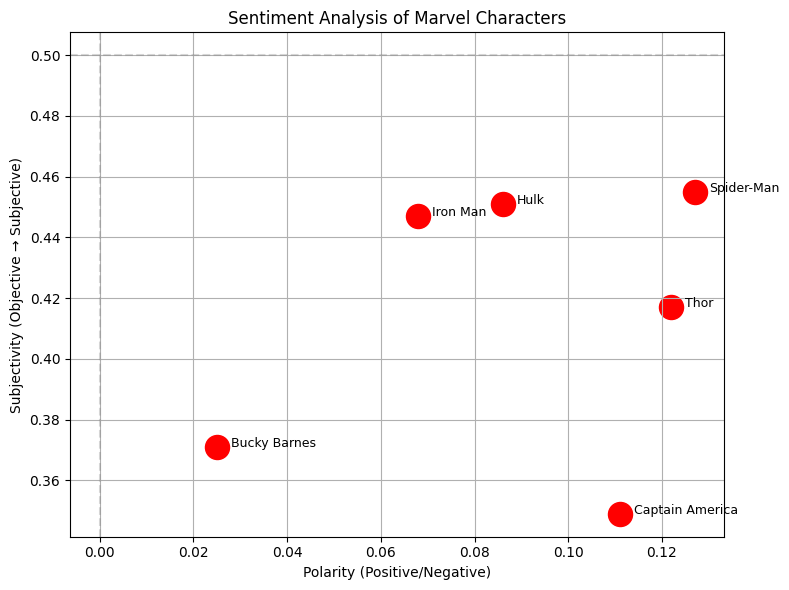

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df_sentiment['Polarity'], df_sentiment['Subjectivity'], color='red', s=300)

for i, row in df_sentiment.iterrows():
    plt.text(row['Polarity'] + 0.003, row['Subjectivity'], row['Character'], fontsize=9)

plt.xlabel('Polarity (Positive/Negative)')
plt.ylabel('Subjectivity (Objective → Subjective)')
plt.title('Sentiment Analysis of Marvel Characters')
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(True)
plt.tight_layout()
plt.show()


Top traits wordcloud text for Iron Man: American American American American American American  comic comic comic comic comic comic  own own ...



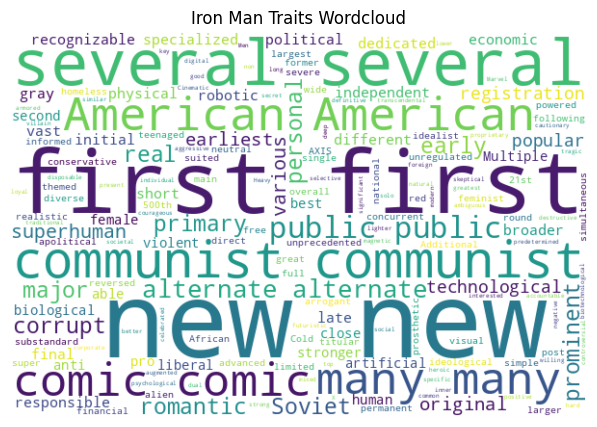


--------------------------------------------------------------------------------

Top traits wordcloud text for Spider-Man: American American  comic comic comic comic comic comic comic comic comic comic comic comic comic com...



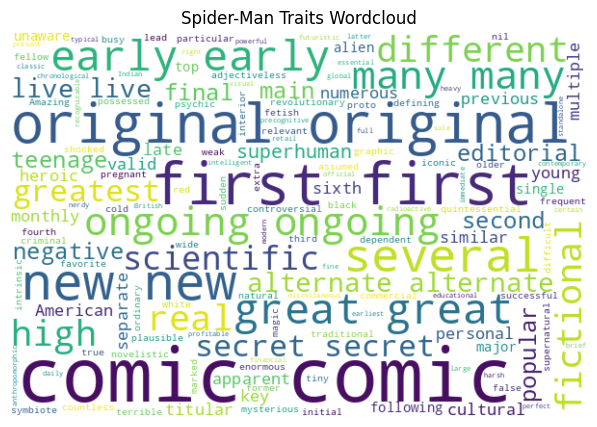


--------------------------------------------------------------------------------

Top traits wordcloud text for Hulk: American  comic comic comic comic comic comic comic comic  dissociative dissociative dissociative di...



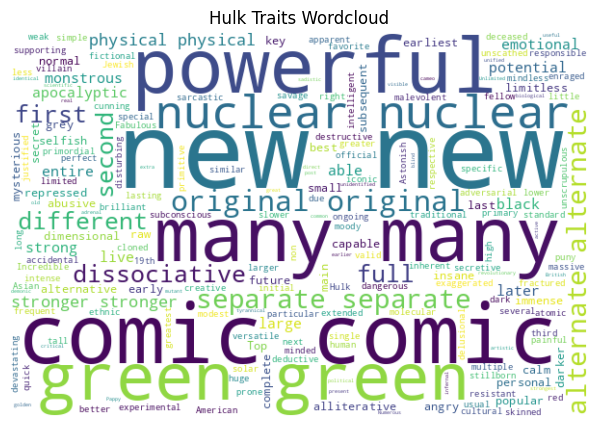


--------------------------------------------------------------------------------

Top traits wordcloud text for Captain America: American American American American American American American American American American American A...



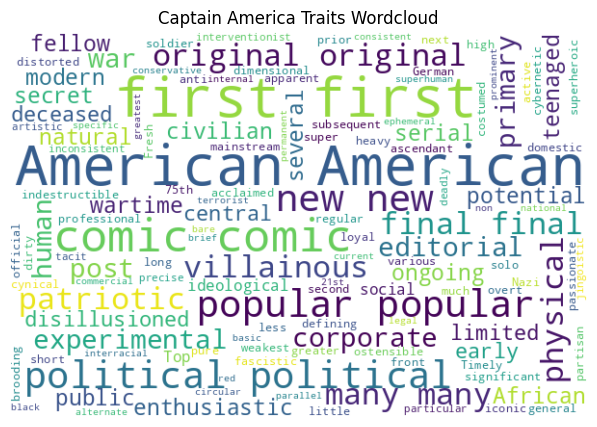


--------------------------------------------------------------------------------

Top traits wordcloud text for Thor: American American  comic comic comic comic  own own own  same same  many many many  mythological myt...



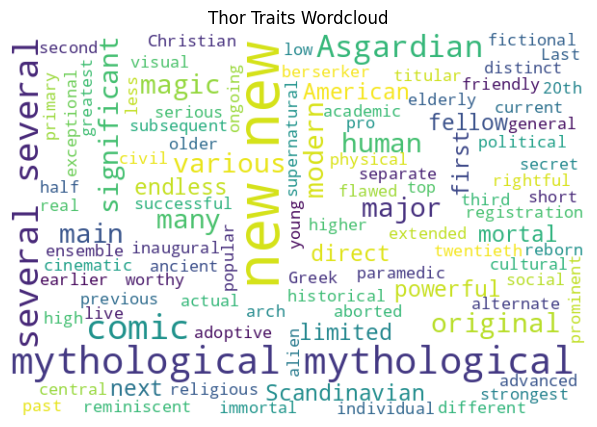


--------------------------------------------------------------------------------

Top traits wordcloud text for Bucky Barnes: other  second  original  further  guilty  new new new  formidable  bionic  S.H.I.E.L.D.  former  tee...



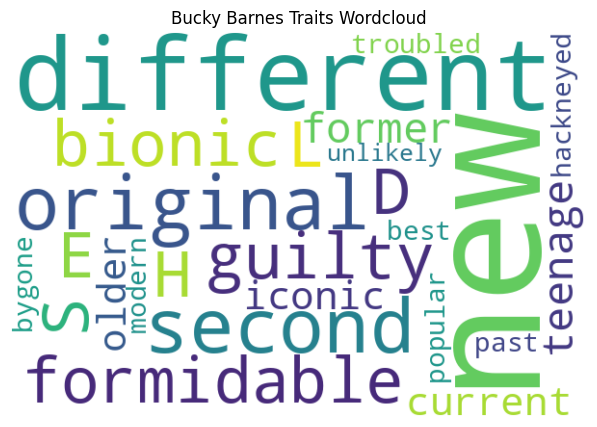


--------------------------------------------------------------------------------



In [17]:
for char_name, traits in all_traits.items():
    if traits:
        traits_text = " ".join([f"{trait} " * count for trait, count in traits.items()])
        print(f"Top traits wordcloud text for {char_name}: {traits_text[:100]}...\n")
        wordcloud = WordCloud(width=600, height=400, background_color='white').generate(traits_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{char_name} Traits Wordcloud")
        plt.show()
        print("\n" + "-"*80 + "\n")
